In [13]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"D:\FUTURE_DS_02\Code\Social_Media_Advertising.csv")

# Calculate KPIs
df["CTR (%)"] = (df["Clicks"] / df["Impressions"]) * 100
df["Engagement (%)"] = (df["Engagement_Score"] / df["Impressions"]) * 100
df["Performance_Score"] = (df["CTR (%)"] + df["Engagement (%)"] + df["ROI"]) / 3

# Save results
df.to_csv(r"D:\FUTURE_DS_02\Code\Social_Media_Advertising.csv", index=False)

print("KPI calculations added successfully! CSV saved.")




KPI calculations added successfully! CSV saved.


In [5]:
!pip install matplotlib
    


Initial Data Analysis


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Social_Media_Advertising.csv")

# ----- IDA REPORT -----
print("===== SHAPE (Rows, Columns) =====")
print(df.shape)

print("\n===== DATA TYPES =====")
print(df.dtypes)

print("\n===== MISSING VALUES =====")
print(df.isnull().sum())

print("\n===== SUMMARY STATISTICS =====")
print(df.describe())

print("\n===== UNIQUE VALUES OF CATEGORICAL COLUMNS =====")
for col in df.select_dtypes(include=['object']).columns:
    print(col, ":", df[col].nunique())


===== SHAPE (Rows, Columns) =====
(300000, 19)

===== DATA TYPES =====
Campaign_ID            int64
Target_Audience       object
Campaign_Goal         object
Duration              object
Channel_Used          object
Conversion_Rate      float64
Acquisition_Cost      object
ROI                  float64
Location              object
Language              object
Clicks                 int64
Impressions            int64
Engagement_Score       int64
Customer_Segment      object
Date                  object
Company               object
CTR (%)              float64
Engagement (%)       float64
Performance_Score    float64
dtype: object

===== MISSING VALUES =====
Campaign_ID          0
Target_Audience      0
Campaign_Goal        0
Duration             0
Channel_Used         0
Conversion_Rate      0
Acquisition_Cost     0
ROI                  0
Location             0
Language             0
Clicks               0
Impressions          0
Engagement_Score     0
Customer_Segment     0
Date          

EDA

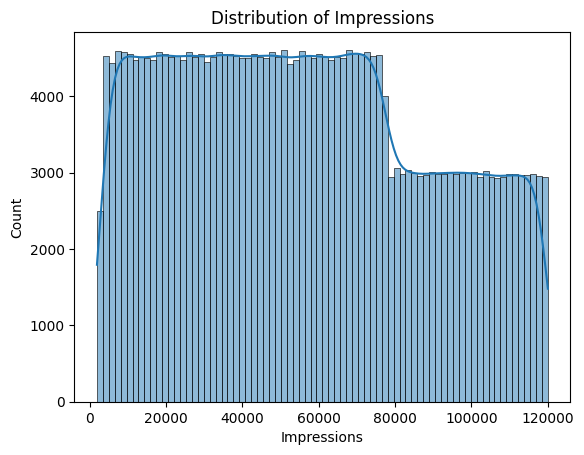

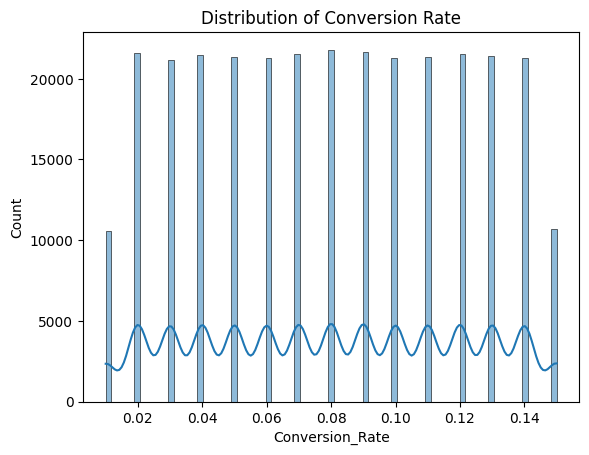

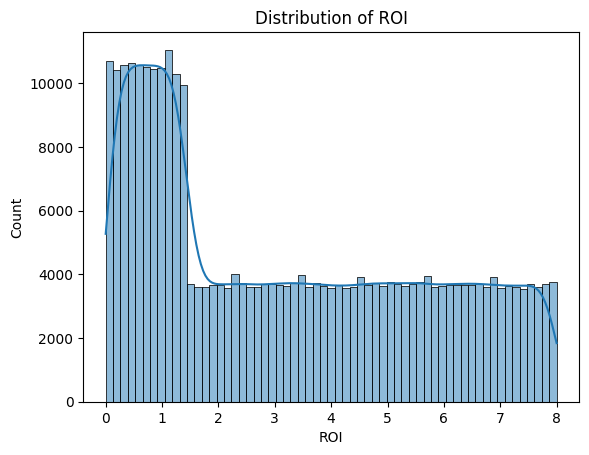

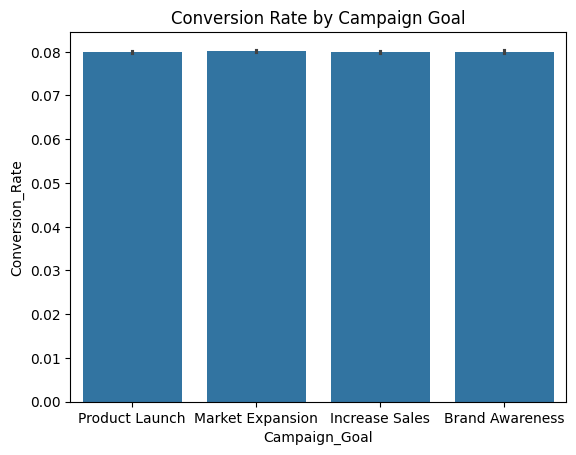

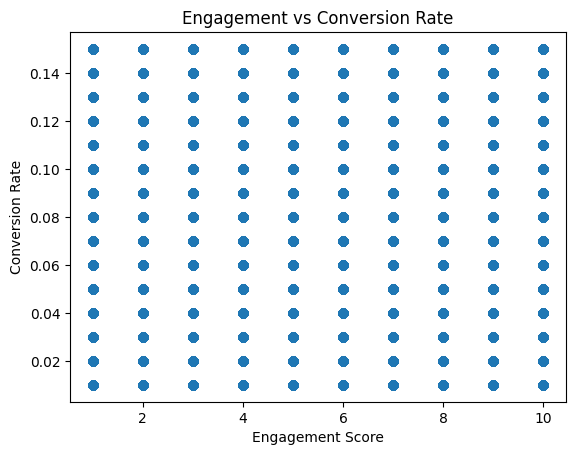

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Distribution of Impressions
sns.histplot(df["Impressions"], kde=True)
plt.title("Distribution of Impressions")
plt.show()

# 2. Conversion Rate Distribution
sns.histplot(df["Conversion_Rate"], kde=True)
plt.title("Distribution of Conversion Rate")
plt.show()

# 3. ROI Distribution
sns.histplot(df["ROI"], kde=True)
plt.title("Distribution of ROI")
plt.show()

# 4. Bar chart – Campaign Goals comparison
sns.barplot(x="Campaign_Goal", y="Conversion_Rate", data=df)
plt.title("Conversion Rate by Campaign Goal")
plt.show()

# 5. Engagement Score vs Conversion Scatter Plot
plt.scatter(df["Engagement_Score"], df["Conversion_Rate"])
plt.title("Engagement vs Conversion Rate")
plt.xlabel("Engagement Score")
plt.ylabel("Conversion Rate")
plt.show()



CDA

1. Best Performing Target Audience

In [7]:
print("ROI by Target Audience")
print(df.groupby("Target_Audience")["ROI"].mean().sort_values(ascending=False))


ROI by Target Audience
Target_Audience
All Ages       3.211133
Men 18-24      3.195236
Women 45-60    3.185882
Women 35-44    3.178001
Women 25-34    3.176880
Men 45-60      3.169175
Women 18-24    3.163396
Men 35-44      3.160078
Men 25-34      3.159559
Name: ROI, dtype: float64


2. Performance by Channel

In [8]:
print("\nConversion Rate by Channel")
print(df.groupby("Channel_Used")["Conversion_Rate"].mean().sort_values(ascending=False))



Conversion Rate by Channel
Channel_Used
Twitter      0.080363
Pinterest    0.080042
Facebook     0.079870
Instagram    0.079764
Name: Conversion_Rate, dtype: float64


3. Engagement Score by Customer Segment

In [9]:
print("\nEngagement Score by Customer Segment")
print(df.groupby("Customer_Segment")["Engagement_Score"].mean().sort_values(ascending=False))




Engagement Score by Customer Segment
Customer_Segment
Health        4.384532
Fashion       4.379062
Technology    4.368633
Food          4.365020
Home          4.348852
Name: Engagement_Score, dtype: float64


4. ROI by Location

In [10]:
print("\nROI by Location")
print(df.groupby("Location")["ROI"].mean().sort_values(ascending=False))



ROI by Location
Location
New York       3.189703
Miami          3.179352
Las Vegas      3.176499
Los Angeles    3.174227
Austin         3.168688
Name: ROI, dtype: float64


5. Top Companies by Performance Score

In [11]:
print("\nTop Companies by Performance Score")
print(df.groupby("Company")["Performance_Score"].mean().sort_values(ascending=False).head(10))



Top Companies by Performance Score
Company
Style Sphere       11.572292
Tech Titans        11.566214
Attire Artistry    11.559278
Code Crafters      11.558314
Trend Tailors      11.558191
Vital Vigor        11.552621
Culinary Quest     11.552332
Gadget Giants      11.550989
NexGen Nerds       11.550756
Balance Beam       11.550731
Name: Performance_Score, dtype: float64


Visual CDA

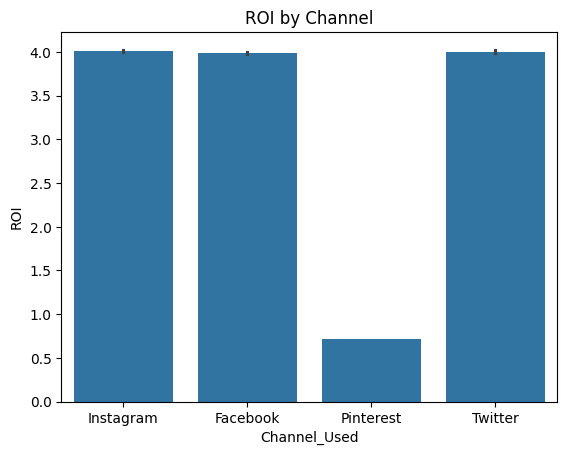

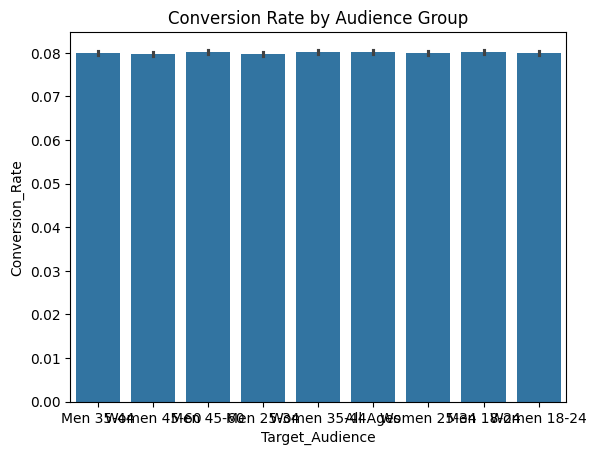

In [12]:
sns.barplot(x="Channel_Used", y="ROI", data=df)
plt.title("ROI by Channel")
plt.show()

sns.barplot(x="Target_Audience", y="Conversion_Rate", data=df)
plt.title("Conversion Rate by Audience Group")
plt.show()


In [13]:
df.to_csv("Final_Social_Media_Campaign_Data.csv", index=False)
print("Final dataset ready for Power BI")


Final dataset ready for Power BI
